In [1]:
import numpy as np
import matplotlib.pyplot as plt

from hedging import simulate_delta_hedge
from black_scholes import black_scholes_price

In [2]:
# Option parameters
S0 = 100      # Initial stock price
K = 100       # Strike price
T = 1.0       # Time to maturity (in years)
r = 0.05      # Risk-free rate
sigma = 0.2   # Volatility
option_type = "call"

n_steps = 50
dt = T / (n_steps - 1)
np.random.seed(42)

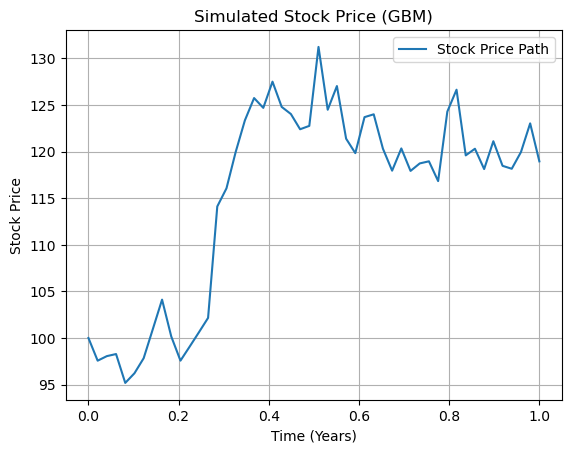

In [12]:
def generate_gbm_path(S0, T, r, sigma, steps):
    dt = T / (steps - 1)
    Z = np.random.normal(0, 1, steps - 1)
    log_returns = (r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z
    log_price = np.log(S0) + np.cumsum(np.insert(log_returns, 0, 0))
    return np.exp(log_price)

S_path = generate_gbm_path(S0, T, r, sigma, n_steps)

# Plot the path
plt.plot(np.linspace(0, T, n_steps), S_path, label="Stock Price Path")
plt.title("Simulated Stock Price (GBM)")
plt.xlabel("Time (Years)")
plt.ylabel("Stock Price")
plt.grid(True)
plt.legend()
plt.savefig("gbm_stock_price_path.png")
plt.show()

In [13]:
results = simulate_delta_hedge(
    S_path=S_path,
    K=K,
    T=T,
    r=r,
    sigma=sigma,
    option_type=option_type,
    rebalance_times=n_steps
)

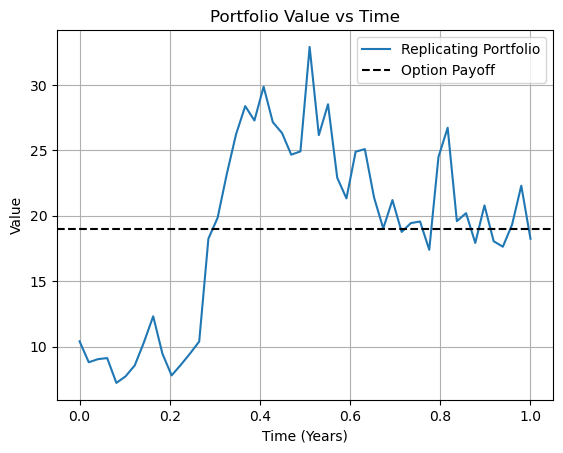

In [17]:
time_grid = np.linspace(0, T, n_steps)

plt.plot(time_grid, results["portfolio_values"], label="Replicating Portfolio")
plt.axhline(results["option_payoff"], color='black', linestyle='--', label="Option Payoff")
plt.title("Portfolio Value vs Time")
plt.xlabel("Time (Years)")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.savefig("portfolio_value_vs_time.png")
plt.show()

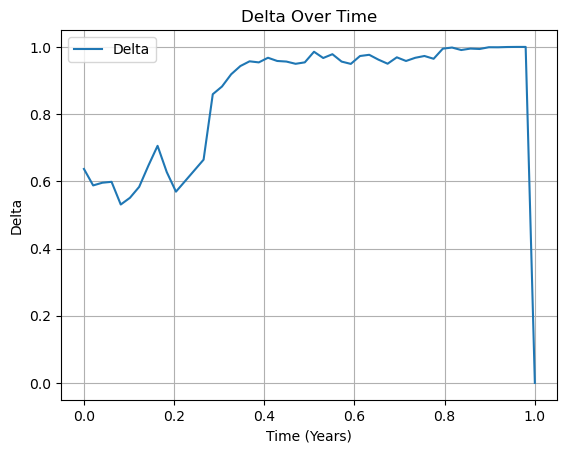

In [18]:
plt.plot(time_grid, results["deltas"], label="Delta")
plt.title("Delta Over Time")
plt.xlabel("Time (Years)")
plt.ylabel("Delta")
plt.grid(True)
plt.legend()
plt.savefig("delta_over_time.png")
plt.show()

In [16]:
print(f"Final Stock Price: ₹{results['stock_final']:.2f}")
print(f"Option Payoff: ₹{results['option_payoff']:.2f}")
print(f"Portfolio Value at Expiry: ₹{results['portfolio_values'][-1]:.2f}")
print(f"Hedging Error: ₹{results['hedge_error']:.2f}")

Final Stock Price: ₹118.96
Option Payoff: ₹18.96
Portfolio Value at Expiry: ₹18.24
Hedging Error: ₹-0.72
